### Project: Create a neural network class

---

Based on previous code examples, develop a neural network class that is able to classify any dataset provided. The class should create objects based on the desired network architecture:

1. Number of inputs
2. Number of hidden layers
3. Number of neurons per layer
4. Number of outputs
5. Learning rate

The class must have the train, and predict functions.

Test the neural network class on the datasets provided below: Use the input data to train the network, and then pass new inputs to predict on. Print the expected label and the predicted label for the input you used. Print the accuracy of the training after predicting on different inputs.

Use matplotlib to plot the error that the train method generates.

**Don't forget to install Keras and tensorflow in your environment!**

---

### Import the needed Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Needed for the mnist data
from keras.datasets import mnist
from keras.utils import to_categorical 

Using TensorFlow backend.


### Define the class

In [0]:
class NeuralNetwork:

    def __init__(self, architecture, alpha):
        """
        architecture: List of integers which represents the architecture of the network.
        alpha:  Learning rate.
        """
        # TODO: Initialize the list of weights matrices, then store
        # the network architecture and learning rate
        
        # wx + b where w is matrix of weights, x is vector of each layer's neurons
        # and b is the vector of bias
        
        # Initialize data from architecture and alpha
        self.inputs = architecture["inputs"]
        self.neurons_per_layer = architecture["neurons_per_layer"]
        
        self.hidden_layers = architecture["hidden_layers"]
        self.outputs = architecture["outputs"]
        
        # Learning rate: rate of change in approximation to find local/global minimum
        self.alpha = alpha 
        
        # Initialize input data and bias for inactivity
        self.input_weights = np.zeros((self.inputs, self.neurons_per_layer))
        for i in range(0, len(self.input_weights)):
            for j in range(0, len(self.input_weights[0])):
                self.input_weights[i][j] = np.random.randn()
        
        self.input_bias = np.zeros(self.neurons_per_layer)
        for i in range(0, self.neurons_per_layer):
            self.input_bias[i] = np.random.randn()
        
        # Initialize hidden weights matrix and bias for inactivity
        self.hidden_weights = np.zeros((self.hidden_layers - 1, self.neurons_per_layer, self.neurons_per_layer))
       
        for i in range(1, self.hidden_layers):
            for j in range(0, len(self.hidden_weights[0])):
                self.hidden_weights[0][j] = np.random.randn()
        
        self.hidden_bias = np.zeros((self.hidden_layers - 1, self.neurons_per_layer))
        #for i in range(0, len(self.hidden_bias[0])):
        #    self.hidden_bias[0][i] = np.random.randn()
            
        # Initialize ouput data and bias for inactivity
        self.output_weights = np.zeros((self.neurons_per_layer, self.outputs))
        for i in range(0, len(self.output_weights)):
            for j in range(0, len(self.output_weights[0])):
                self.output_weights[i][j] = np.random.randn()
        
        self.output_bias = np.zeros(self.outputs)
        for i in range(0, self.outputs):
            self.output_bias[i] = np.random.randn()
        
        pass
    
    def __repr__(self): 
        # construct and return a string that represents the network 
        # architecture 
        return "NeuralNetwork: {}".format( "-".join(str(l) for l in self.layers))

    def softmax(self, X):  
        # applies the softmax function to a set of values
        expX = np.exp(X)
        return expX / expX.sum(axis=1, keepdims=True)
        
    def sigmoid(self, x):
        # the sigmoid for a given input value
        return 1.0 / (1.0 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        # the derivative of the sigmoid
        return x * (1 - x)
    
    def get_nth_level(self, inputs):
        nth_level = np.zeros((self.hidden_layers, inputs.shape[0], self.neurons_per_layer))
        for i in range(0, self.hidden_layers):
            if i is 0:
                weighted_sum = np.dot(inputs,self.input_weights) + self.input_bias
            else:
                weighted_sum = np.dot(nth_level[i-1],self.hidden_weights[i-1])+self.hidden_bias[i-1]
            nth_level[i] = self.sigmoid(weighted_sum)
        return nth_level
        
    def predict(self, inputs):
        # TODO: Define the predict function
        # level0 = XOR
        # level1 = sigmoid(np.dot(level0, weights0)+b0)
        # level2 = sigmoid(np.dot(level1, weights1)+b1)
        # Forward propagation
        
        nth_level = self.get_nth_level(inputs)
        return (self.softmax(np.dot(nth_level[-1], self.output_weights) + self.output_bias)), nth_level
        pass
        
    def back_propagation(self, level2_error, y_hat, last_level, nth_level, inputs):
        # Backpropagation
    
        # error at the last level multiplied by the derivative of the prediction, used to scale the error:
        # if a node has too much fault for the error, its contribution is minimized
        # essentially, how much the weight1 will change
        level2_delta = level2_error * self.sigmoid_deriv(y_hat)
            
        # propagate the error to the first level by dotting the delta by first weights transposed
        # this is the error at the hidden layer
        level1_error = np.dot(level2_delta, self.output_weights.T)
            
            
        # update weights by the delta at each level. This propagates the errors through
        #weights1 += np.dot(level1.T, level2_delta) * alpha
        #weights0 += np.dot(level0.T, level1_delta) * alpha
        self.output_weights += np.dot(last_level.T, level2_delta) * self.alpha
            
        # error at the first level multiplied by the derivative of the hidden layer, used to minimize the error
        # essentially, how much the weight0 will change
        #level1_delta = level1_error * sigmoid_der(level1)
        level2_delta = level1_error * self.sigmoid_deriv(last_level)
            
        #b0_delta = np.sum(level1_delta)    
        b1_delta = np.sum(level2_delta)

        #b1 += b1_delta * alpha
        self.output_bias += b1_delta * self.alpha
        #b0 += b0_delta * alpha    
            
        # Iterate through all hidden_layers and repeat process
        for i in range(0, self.hidden_layers - 1):
            # Sum the level_2 deltas
            b_delta = np.sum(level2_delta)
                
            # Get the hidden bias from last to first
            #b1 += b1_delta * alpha
            self.hidden_bias[-1 - i] += b_delta * self.alpha
                
            # propagate the error to the first level by dotting the delta by first weights transposed
            # this is the error at the hidden layer
            level1_error = np.dot(level2_delta, self.hidden_weights[- 1 - i])
                
            # update weights by the delta at each level. This propagates the errors through
            self.hidden_weights[-1 - i] += np.dot(nth_level[-2 - i].T, level2_delta) * self.alpha
            # error at the first level multiplied by the derivative of the hidden layer, used to minimize the error
            # essentially, how much the weight0 will change
            level2_delta = level1_error * self.sigmoid_deriv(nth_level[- 2 - i])
            
        #b0_delta = np.sum(level1_delta) 
        b_delta = np.sum(level2_delta)
        # Get the hidden bias
        #b1 += b1_delta * alpha
        self.hidden_bias += b_delta * self.alpha
        self.input_weights += np.dot(inputs.T, level2_delta) * self.alpha
        
    def train(self, inputs, labels, epochs = 1000, displayUpdate = 100):
        # TODO: Define the training step for the network. It should include the forward and back propagation
        # steps, the updating of the weights, and it should print the error every 'displayUpdate' epochs
        # It must return the errors so that they can be displayed with matplotlib
        errors = []
        for j in range(0, epochs):
            y_hat, nth_level = self.predict(inputs)
            
            # forward propagation
            last_level = nth_level[-1]

            # error at the last level
            level2_error = labels - y_hat
            
            # Call for back propagation
            self.back_propagation(level2_error, y_hat, last_level, nth_level, inputs)
                
            # Append the error
            errors.append(np.mean(np.abs(level2_error)))
            # print error after X steps
            if j%displayUpdate == 0:
                print("Error:", np.mean(np.abs(level2_error)))
            
        return errors
        pass
    
    def print_summary(self):
        print("\nw input",self.input_weights.shape[0],"inputs target ", self.input_weights.shape[1], "neurons")
        print("\nw input",self.input_weights)
        print("\nb input",self.input_bias.shape[0], "bias, one bias for each target neuron")
        print("\nb input",self.input_bias)
        
        print("\nw hidden", self.hidden_weights.shape[0], "weight matrices",  self.hidden_weights.shape[1], " * ",  self.hidden_weights.shape[2])
        print("\nw hidden", self.hidden_weights)
        print("\nb hidden",self.hidden_bias[0].shape[0], "bias, one bias for each target neuron")
        print("\nb hidden",self.hidden_bias)
        
        
        print("\nw output",self.output_weights.shape[0],"neurons target ", self.output_weights.shape[1], "output neurons")
        print("\nw output",self.output_weights)
        print("\nb output",self.output_bias.shape[0], "bias, one bias for each target output neuron")
        print("\nb output",self.output_bias)
      


In [0]:
# Helper functions
def print_missclassified(errors, test_images):
  if len(errors)%2 == 0:
    size = len(errors)/2
    rows = 2
  elif len(errors)%3 == 0:
    size = len(errors)/3
    rows = 3
  elif len(errors)%5 == 0:
    size = len(errors)/5
    rows = 5

  f, plots = plt.subplots(rows, int(size), figsize=(15,10))

  plots = [plot for sublist in plots for plot in sublist]

  zipped_errors_plots = zip(errors, plots)
  for (index, pred, label), plot in zipped_errors_plots:
    plot.imshow(test_images[index].reshape(28,28), cmap="gray")

In [4]:
# Exploring the initialization of a neural network
architecture = {
    "inputs": 4,
    "hidden_layers": 2,
    "neurons_per_layer":3,
    "outputs": 2,
}

neural_network = NeuralNetwork(architecture, 3)
neural_network.print_summary()


w input 4 inputs target  3 neurons

w input [[ 0.81397545 -0.97236653  1.50593936]
 [ 0.51699657  0.85562028 -1.14185178]
 [ 2.23574674 -0.55526494  1.88023369]
 [ 1.31723022  0.2886286  -0.02578227]]

b input 3 bias, one bias for each target neuron

b input [-0.27088557  0.16195855  2.19556713]

w hidden 1 weight matrices 3  *  3

w hidden [[[0.1775513  0.1775513  0.1775513 ]
  [0.63155017 0.63155017 0.63155017]
  [1.81403055 1.81403055 1.81403055]]]

b hidden 3 bias, one bias for each target neuron

b hidden [[0. 0. 0.]]

w output 3 neurons target  2 output neurons

w output [[ 1.41056633 -0.85947414]
 [-0.07836027  1.80426631]
 [-1.20249267  0.13505206]]

b output 2 bias, one bias for each target output neuron

b output [-0.29048452 -0.70430203]


### Test datasets

#### XOR

In [0]:
# input dataset
XOR_inputs = np.array([  
                [0,0],
                [0,1],
                [1,0],
                [1,1]
            ])

# labels dataset            
# Modifying shape with encoding
XOR_labels = np.array([[1,0], [0,1], [0,1], [1,0]])

Error: 0.49762343237768225
Error: 0.16712617229479282
Error: 0.1386004167775095
Error: 0.13178025654929584
Error: 0.12837303962067156

Output of the first input After Training:

[[0.98151347 0.01848653]
 [0.02198575 0.97801425]
 [0.01904511 0.98095489]
 [0.55457249 0.44542751]]


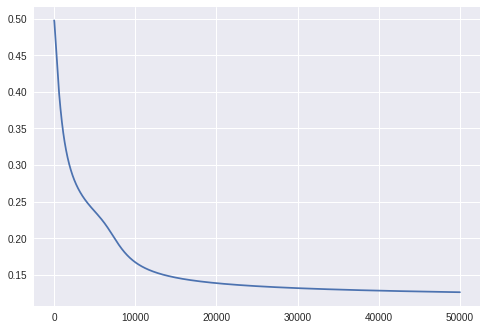

In [6]:
architecture = {
    "inputs": 2,
    "hidden_layers": 1,
    "neurons_per_layer":3,
    "outputs": 2
}

neural_network = NeuralNetwork(architecture, 0.1)
errors = neural_network.train(XOR_inputs, XOR_labels, 50000, 10000)

#Predict on the sample input
print("\nOutput of the first input After Training:\n")
prediction = neural_network.predict(XOR_inputs)[0]
print(prediction)

f, ax = plt.subplots(1,1)
ax.plot(errors)

#### Multiple classes

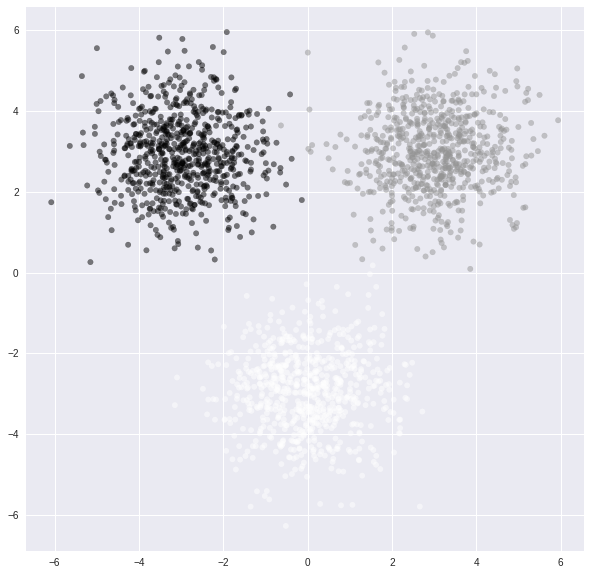

In [7]:
# Creates the data points for each class
class_1 = np.random.randn(700, 2) + np.array([0, -3])  
class_2 = np.random.randn(700, 2) + np.array([3, 3])  
class_3 = np.random.randn(700, 2) + np.array([-3, 3])

feature_set = np.vstack([class_1, class_2, class_3])

labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):  
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,10))  
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, s=30, alpha=0.5)  
plt.show()

Error: 0.4036403388391455
Error: 0.07147929180651265
Error: 0.052328178901522276
Error: 0.042906578443998075
Error: 0.03719606871480455
Error: 0.03327248078699863
Error: 0.030363091306284007
Error: 0.028093223483355096
Error: 0.026257155752156622
Error: 0.02473158497463553

Output of the first input After Training:

[[0.0023105  0.00705379 0.99063572]]


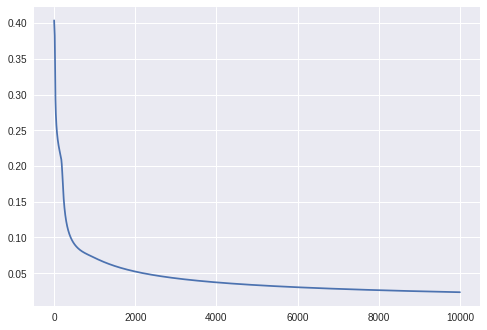

In [8]:
#TODO: Test the class with the multiple classes data
architecture = {
    "inputs": 2,
    "hidden_layers": 1,
    "neurons_per_layer":3,
    "outputs": 3,
}

neural_network = NeuralNetwork(architecture, 0.001)
errors = neural_network.train(feature_set, one_hot_labels, 10000, 1000)

#Predict on the sample input
print("\nOutput of the first input After Training:\n")
test = np.array([[-2,2]])
prediction = neural_network.predict(test)[0]
print(prediction)

f, ax = plt.subplots(1,1)
ax.plot(errors)

#### On the mnist data set

---
Train the network to classify hand drawn digits.

For this data set, if the training step is taking too long, you can try to adjust the architecture of the network to have fewer layers, or you could try to train it with fewer input. The data has already been loaded and preprocesed so that it can be used with the network.

---

11493376/11490434 [==============================] - 0s 0us/step


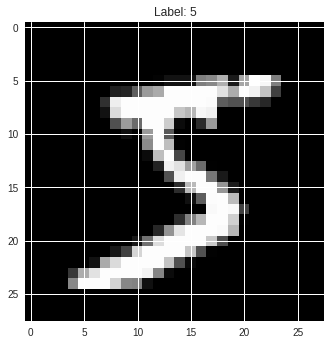

In [9]:
# Load the train and test data from the mnist data set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Plot a sample data point
plt.title("Label: " + str(train_labels[0]))
plt.imshow(train_images[0], cmap="gray")

In [0]:
# Standardize the data

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28))
# turn values from 0-255 to 0-1
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# Create one hot encoding for the labels
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

Error: 0.1802790495835534
Error: 0.12176327476164435
Error: 0.10246249184912064
Error: 0.09362990819040079
Error: 0.08940058426152929
Error: 0.08627477142661191
Error: 0.0836371422930682
Error: 0.08179181372309623
Error: 0.07931373811856261
Error: 0.07574624056212749


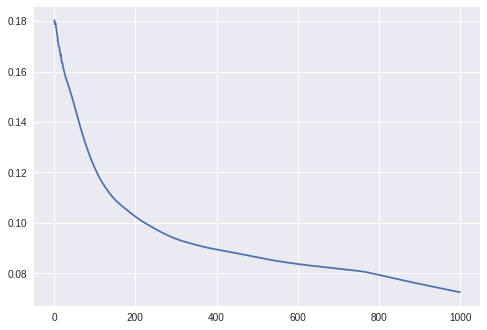

In [11]:
# TODO: Test the class with the mnist data. Test the training of the network with the test_images data, and 
# record the accuracy of the classification.
#TODO: Test the class with the multiple classes data
architecture = {
    "inputs": 784,
    "hidden_layers": 2,
    "neurons_per_layer":64,
    "outputs": 10,
}

neural_network = NeuralNetwork(architecture, 0.0005)
errors = neural_network.train(train_images[0:5000], train_labels[0:5000], 1000, 100)
f, ax = plt.subplots(1,1)
ax.plot(errors)


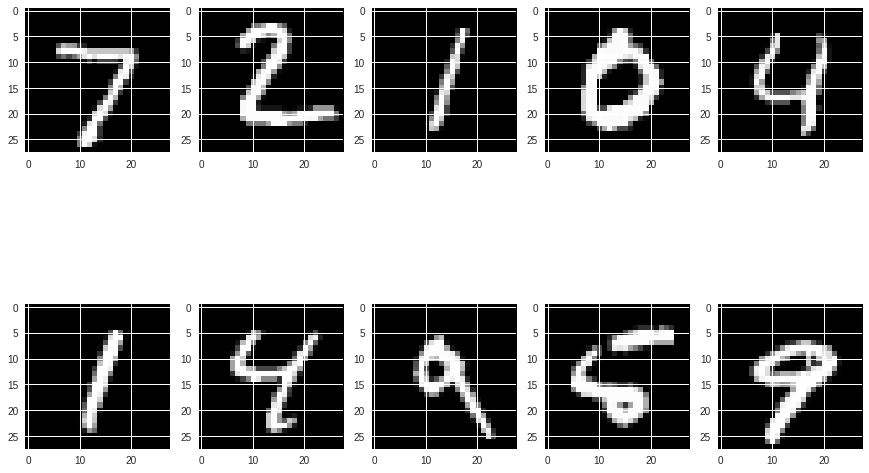

In [13]:
# TO DO
#Put 1000 images, get prediction vector
prediction_vector = neural_network.predict(test_images[0:1000])

# Get labels
labels_vector = to_categorical(test_labels[0:1000])

# Iterate through all prediction vector
for i in range(0, len(prediction_vector[0])):
  # Check if passes treshold as seen on SuperDataScience
  # Activate if probability is bigger than .5
  if any(prediction_vector[0][i] >= 5):
    prediction_vector[0][i] = 1
  else:
    prediction_vector[0][i] = 0

# Taken from DL Neural Network Examples
errors = []
for index, (prediction, label) in enumerate(zip(prediction_vector[0][0:10], labels_vector[0:10])):
    if not np.array_equal(prediction, label):
        errors.append((index, prediction, label))

print_missclassified(errors, test_images)


After predicting on the *test_images*, use matplotlib to display some of the images that were not correctly classified. Then, answer the following questions: 

1. **Why do you think those were incorrectly classified?**
R.- Because certain image's noise might be identified as a feature present in other data, thus categorizing the image as another entity. Therefore, there could be inconsistency in the model and it could be throwing false postives and negatives.

2. **What could you try doing to improve the classification accuracy?**
R.- We could fine-tune hyper-parameters and the number of neurons_per_layer, hidden_layers, etc. Also, we could try to provide more training data in order to better fit the model. It can be noted, also, that the performance of different algorithms converge as data quantity augments, so augmenting the data available could help making a better model, as well as selecting other kind of activation functions, etc.
